## What is Naive Bayes Classifier?
- Naive Bayes Classifier is an algorythm based on Bayes' theorem. The term naive assumes that the features are conditionally independent.
- Bayes' theorem is $ P(A|B) = \frac{P(A \cap B)}{P(B)} =  \frac{P(B|A) * P(A)}{P(B)} $ where P(A|B) is conditional probability - probability of A after B happens.
- Each feature is equally important due to multiplication of each feature in likelihood.
### 1. Naive Bayes classifier 
1) The basic foundation is from this equation : <br>
- Naive Bayes uses $ P(A|B) -> Posterior = \frac{likelihood * prior}{evidence} $
<br>
- Posterior is our target.
<br>
- Likelihood is P(B|A).
<br>
- Evidence(marginal) is P(B).
<br>



##### Reference Link : https://www.geeksforgeeks.org/naive-bayes-classifiers/

### 2. Mathematical process
1) Classification: <br>

-  $ P(y \mid x_{i}) = \frac{P(x_{i} \mid y) * P(y)}{P(x_{i})} $
-  $ P(y \mid x_{1}, ... , x_{n}) = \frac{
P(x_{1} \mid y) * P(x_{2} \mid y) * ... * P(x_{n} \mid y) * P(y)
}
{
P(x_{1})P(x_{2})...P(x_{n})
} $
- $ = 
\frac{
P(y) \prod_{1}^{n} P(x_i \mid y)
}
{
\prod_{1}^{n} P(x_{i})
}
$

- Because the denominator is given in the dataset P(x), we can treat this as constant.
- $ y = argmax_{y} P(y) \prod_{1}^{n} P(x_i \mid y) $


  3) $ P(x_{i}\mid y) = \frac{1}{\sqrt{2\pi \sigma_y^{2}}} \exp \left(-\frac{(x_{i} -\mu_{y})^2}{2\sigma_y^{2}} \right) $


In [1]:
%pip install ucimlrepo

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53)['data']['original']
  
# data (as pandas dataframes) 
X = iris[[i for i in iris.columns if i not in ['class']]]
y = iris['class']


In [7]:
iris.head(5)


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
iris.groupby('class')['class'].count()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

### We can check their distribution by boxplot and histogram of each class to see if they are normally distributed.

<AxesSubplot: >

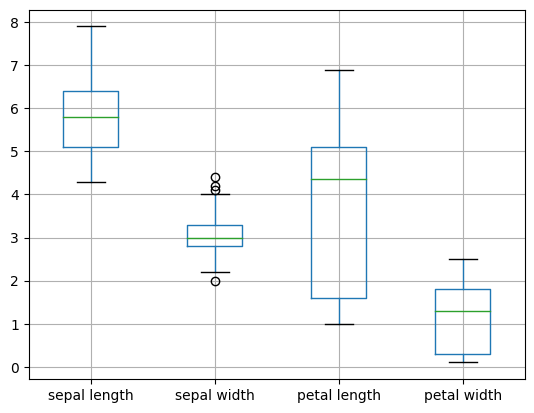

In [17]:
iris.boxplot()

In [35]:
# import matplotlib.pyplot as plt
# iris.plot.hist(column='sepal length',by='class',bins=5)
# plt.show()

# iris.plot.hist(column='sepal width',by='class',bins=5)
# plt.show()

# iris.plot.hist(column='petal length',by='class',bins=5)
# plt.show()

# iris.plot.hist(column='petal width',by='class',bins=5)
# plt.show()

<AxesSubplot: >

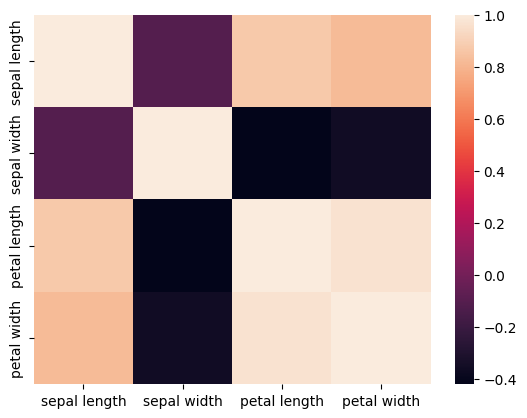

In [36]:
import seaborn as sns
%matplotlib inline

#petal - 꽃잎 corolla of a flower
#sepal - 꽃받침 thing that encloses the petals and typically green and leaflike

# calculate the correlation matrix on the numeric columns
corr = X.corr()

# plot the heatmap
sns.heatmap(corr)

Let's bring the equation for continous variables
$ P(x_{i}\mid y) = \frac{1}{\sqrt{2\pi \sigma_y^{2}}} \exp \left(-\frac{(x_{i} -\mu_{y})^2}{2\sigma_y^{2}} \right) $

We can break the formula by each feature in our model. <br>
$ P(x_{i}\mid y) = argmax_{j=1}^{m}(P(x_{Iris-setosa}\mid y_j),P(x_{Iris-versicolor}\mid y_j),P(x_{Iris-virginica}\mid y_j)) $

- The above formula seems a bit tricky without breaking apart into details. We can look at the detail for one class at a feature level.

### Likelihood P(x|y) <br>
We can simply get likelihood of being first class using the below equation. <br>
$ P(x_i|y=class1) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi \sigma_y^{2}}} \exp \left(-\frac{(x_{i} -\mu_{y})^2}{2\sigma_y^{2}} \right) $ <br>
$ = \prod_{i=1}^{n} P(x_{i}|y_{1}) $ <br>
Here, the likelihood of each feature means where this data point falls under the normal distribution with the given mean and std from the dataset.<br>
One of our assumption is our features are conditionally independent given the target class.<br>
Therefore, we are allowed to multiply each likelihood of feature to get the probablity of being that data point with all features for a class. <br>
So our final likelihood will be following: <br>
$ argmax_{j=1}^{m} (\prod_{i=1}^{n} P(x_i|y=class_j)) $

### Evidence P(x) <br>
$ P(x) = \sum_{j=1}^{m} P(x|y=j)P(y=j) $ <br>
This is because we cannot get P(x) by taking the proportion to the entire dataset. Proportion sounds it is relying on empirical estimate. However, you are not assuming anything under a certain distribution which can also lead a bais because, for continous variable, you may have something close to values in each feature, but you are relying on proportions and may not have any values that are matching. In this case, you P(x) will be very small and lead to a too rough estimate.

### Posterior P(y|x) <Br>
This is our final probability for classification problem. <br>
It can be derived using finally Likelihood and Evidence from the above. <br>
$ P(y|x) = \frac{P(x|y)*p(y)}{p(x)} $

### Practice : 
Let's get to the details how we can calculate with our dataset.

In [67]:
import math
def get_p_given_y(x_i:float,mu_y:float,std_y:float):
    p_x_y = (
        (1/math.sqrt(2*math.pi**2)) 
        * 
        math.exp(
            -((x_i - mu_y)**2)/(2*std_y**2)
        )
    )
    return p_x_y




In [68]:
iris.groupby(['class']).agg(['mean','std']).reset_index()

class sepal length           sepal width           petal length  \
                           mean       std        mean       std         mean   
0      Iris-setosa        5.006  0.352490       3.418  0.381024        1.464   
1  Iris-versicolor        5.936  0.516171       2.770  0.313798        4.260   
2   Iris-virginica        6.588  0.635880       2.974  0.322497        5.552   

            petal width            
        std        mean       std  
0  0.173511       0.244  0.107210  
1  0.469911       1.326  0.197753  
2  0.551895       2.026  0.274650

In [69]:
# example
print(get_p_given_y(x_i=5,mu_y=5.006,std_y=0.352490))
print(get_p_given_y(x_i=5,mu_y=3.418,std_y=0.381024))
print(get_p_given_y(x_i=5,mu_y=1.464,std_y=0.173511))

0.2250464741615915
4.064118694051635e-05
1.4767578447297364e-91


In [70]:
(iris.groupby('class')['class'].count()/iris.shape[0])

class
Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: class, dtype: float64

In [73]:
dict_mean_std = iris.groupby(['class']).agg(['mean','std']).to_dict('list')
dict_mean_std[('sepal length','mean')] # setosa,versicolor, virginica respectively

[5.006, 5.936, 6.587999999999999]

In [97]:
x_1=X.head(1).T[0].to_list()
x_1 # sl, sw, pl, pw

[5.1, 3.5, 1.4, 0.2]

In [98]:
# How to calculate likelihood
p_x1_sl_setosa = get_p_given_y(x_i = x_1[0], mu_y = dict_mean_std[('sepal length','mean')][0], std_y = dict_mean_std[('sepal length','std')][0])
p_x1_sw_setosa = get_p_given_y(x_i = x_1[1], mu_y = dict_mean_std[('sepal width','mean')][0], std_y = dict_mean_std[('sepal width','std')][0])
p_x1_pl_setosa = get_p_given_y(x_i = x_1[2], mu_y = dict_mean_std[('petal length','mean')][0], std_y = dict_mean_std[('petal length','std')][0])
p_x1_pw_setosa = get_p_given_y(x_i = x_1[3], mu_y = dict_mean_std[('petal width','mean')][0], std_y = dict_mean_std[('petal width','std')][0])

print(p_x1_sl_setosa,p_x1_sw_setosa,p_x1_pl_setosa,p_x1_pw_setosa)
p_x1_setosa = p_x1_sl_setosa * p_x1_sw_setosa * p_x1_pl_setosa * p_x1_pw_setosa

p_x1_setosa

#Repeat this for other classes

0.21721641631618133 0.21992669318778105 0.21027701331611803 0.20689947615081528


0.002078364805229067

In [ ]:
x_1=X.head(1).T[0].to_list()
x_1 # sl, sw, pl, pw

In [104]:
p_x1_likelihood_list = []
for i in range(3):
    # How to calculate likelihood
    p_x1_sl_i = get_p_given_y(x_i = x_1[0], mu_y = dict_mean_std[('sepal length','mean')][i], std_y = dict_mean_std[('sepal length','std')][i])
    p_x1_sw_i = get_p_given_y(x_i = x_1[1], mu_y = dict_mean_std[('sepal width','mean')][i], std_y = dict_mean_std[('sepal width','std')][i])
    p_x1_pl_i = get_p_given_y(x_i = x_1[2], mu_y = dict_mean_std[('petal length','mean')][i], std_y = dict_mean_std[('petal length','std')][i])
    p_x1_pw_i = get_p_given_y(x_i = x_1[3], mu_y = dict_mean_std[('petal width','mean')][i], std_y = dict_mean_std[('petal width','std')][i])
    

    p_x1_i = p_x1_sl_i * p_x1_sw_i * p_x1_pl_i * p_x1_pw_i
    
    p_x1_likelihood_list.append(p_x1_i)
p_x1_likelihood_list

[0.002078364805229067, 3.8076215296648023e-20, 5.676987908056648e-27]

In [105]:
import numpy as np


0.000692788268409689

In [107]:
#Evidence from likelihood
x1_evidence = sum([i*(1/3) for i in p_x1_likelihood_list])
x1_evidence

0.000692788268409689

In [109]:
#Posterior
[i*(1/3)/x1_evidence for i in p_x1_likelihood_list]# setosa,versicolor, virginica respectively

[1.0, 1.8320275247564854e-17, 2.7314684572090602e-24]

In [125]:
#Full automated function
def n_b_fn(datainput):
    p_x1_likelihood_list = []
    for i in range(3):
        # How to calculate likelihood
        p_x1_sl_i = get_p_given_y(x_i = datainput[0], mu_y = dict_mean_std[('sepal length','mean')][i], std_y = dict_mean_std[('sepal length','std')][i])
        p_x1_sw_i = get_p_given_y(x_i = datainput[1], mu_y = dict_mean_std[('sepal width','mean')][i], std_y = dict_mean_std[('sepal width','std')][i])
        p_x1_pl_i = get_p_given_y(x_i = datainput[2], mu_y = dict_mean_std[('petal length','mean')][i], std_y = dict_mean_std[('petal length','std')][i])
        p_x1_pw_i = get_p_given_y(x_i = datainput[3], mu_y = dict_mean_std[('petal width','mean')][i], std_y = dict_mean_std[('petal width','std')][i])
        
    
        p_x1_i = p_x1_sl_i * p_x1_sw_i * p_x1_pl_i * p_x1_pw_i
        
        p_x1_likelihood_list.append(p_x1_i)
    x1_evidence = sum([i*(1/3) for i in p_x1_likelihood_list])
    return [i*(1/3)/x1_evidence for i in p_x1_likelihood_list]# setosa,versicolor, virginica respectively
n_b_fn(x_1)


[1.0, 1.8320275247564854e-17, 2.7314684572090602e-24]

In [111]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X,y)

GaussianNB()

In [113]:
x_1

[5.1, 3.5, 1.4, 0.2]

In [118]:
print(gnb.predict_proba(np.array([x_1])))
print(gnb.predict(np.array([x_1])))

[[1.00000000e+00 1.38496103e-18 7.25489025e-26]]
['Iris-setosa']


/Users/tchun/opt/anaconda3/envs/carparts/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/Users/tchun/opt/anaconda3/envs/carparts/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [135]:
# n_b_fn()
for i in range(50,60,1):
    print(n_b_fn(X.iloc[i].to_list()))


[3.7681410221024236e-107, 0.6621266580020119, 0.33787334199798813]
[1.0098743931588455e-99, 0.8888921455990317, 0.11110785440096829]
[4.533497482429522e-121, 0.29254966140087074, 0.7074503385991293]
[9.150166405567126e-70, 0.999921734341772, 7.826565822792809e-05]
[1.947061201138275e-105, 0.9025979632776301, 0.09740203672236995]
[1.3945051343924268e-89, 0.9979398117860291, 0.002060188213970815]
[6.373775633111082e-113, 0.48369394268885596, 0.516306057311144]
[9.824858718334024e-35, 0.9999993557700907, 6.442299092970441e-07]
[4.587746236197247e-97, 0.9786333619169608, 0.021366638083039107]
[5.315669054635867e-69, 0.999778714932676, 0.0002212850673240241]


In [136]:
gnb.predict_proba(X.iloc[50:60])

array([[1.87127931e-108, 8.04037666e-001, 1.95962334e-001],
       [6.18854779e-101, 9.45169639e-001, 5.48303606e-002],
       [1.52821825e-122, 4.56151317e-001, 5.43848683e-001],
       [2.14997261e-070, 9.99968751e-001, 3.12488556e-005],
       [9.04938222e-107, 9.52441811e-001, 4.75581888e-002],
       [1.29272979e-090, 9.99119627e-001, 8.80372565e-004],
       [2.72490532e-114, 6.58952285e-001, 3.41047715e-001],
       [1.19734767e-034, 9.99999767e-001, 2.33206910e-007],
       [3.02545627e-098, 9.90316309e-001, 9.68369084e-003],
       [1.29477666e-069, 9.99909746e-001, 9.02536083e-005]])

In [139]:
result_fn_list=[]
for i in range(X.shape[0]):
    result_fn_list.append(np.argmax(n_b_fn(X.iloc[i].to_list())))
result_fn_list 

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [146]:
import pandas as pd

df = pd.DataFrame({'fn':result_fn_list,'sk':np.argmax(gnb.predict_proba(X),axis=1)})

In [152]:
df.loc[(df.fn!=df.sk),:]

,fn,sk
56,2,1
83,2,1


In [186]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Length: 150, dtype: object

In [194]:
from sklearn.metrics import classification_report
print(classification_report(y,
                      pd.Series(['Iris-setosa' if i == 0 else 'Iris-versicolor' if i == 1 else 'Iris-virginica' for i in result_fn_list])
                     ))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.90      0.92        50
 Iris-virginica       0.90      0.94      0.92        50

       accuracy                           0.95       150
      macro avg       0.95      0.95      0.95       150
   weighted avg       0.95      0.95      0.95       150



In [166]:
print(gnb.predict_proba(X.iloc[[56,83],:]))
for i in range(56,84,1):
    if i in (56,83):
        print(n_b_fn(X.iloc[i].to_list()))

[[2.72490532e-114 6.58952285e-001 3.41047715e-001]
 [2.61124821e-134 6.12159845e-001 3.87840155e-001]]
[6.373775633111082e-113, 0.48369394268885596, 0.516306057311144]
[1.4826900011043284e-132, 0.4345203925241147, 0.5654796074758853]


### What if our dataset is binary case?

In [181]:
X2 = X.assign(
    sl = X['sepal length']>5.843333,
    sw = X['sepal width']>3.054000,
    pl = X['petal length']>3.758667,
    pw = X['petal width']>1.198667
)[['sl','sw','pl','pw']]
iris2 = pd.concat([X2,y],axis=1)

In [182]:
iris2.head(2) #Ture = large, False = small

,sl,sw,pl,pw,class
0,False,True,False,False,Iris-setosa
1,False,False,False,False,Iris-setosa


In [185]:
iris2.groupby('class').sum()

,sl,sw,pl,pw
class,,,,
Iris-setosa,0,42,0,0
Iris-versicolor,26,8,43,40
Iris-virginica,44,17,50,50


In [199]:
iris2.groupby('class').sum().sum(axis=0)

sl    70
sw    67
pl    93
pw    90
dtype: int64

## Math in binary dataset.
### Likelihood <br>
For binary case, we want to calculate $ P(x|y) $ same as continuous variables. <br>
Again we want to calculate each of class' likelihood. First class would be: <br>
$ P(x|y=class1) = \prod_{i=1}^{n} P(x_i|y=class1) $ <br>
Here, $ P(x_i|y=class1) $ will be same as above by multiplying by all probabilities of each feature being true. <br>
Because this is binary, we can simply get their proportion of being true in each feature in each class. <br>
If we have a dataset indicate one feature is being true, we apply the observed proportion and if it's false, we use 1-proportion. <br>
Then, finally multiply all the probabilities of all features to get the specific class being. <br>
$ \theta_{x=i}^{y=j} =  \frac{N_{i,j}}{N_{y_j}} =  \frac{\text{number of times feature } X_i \text{ is 1 in class } y}{\text{total number of samples in class } y} $
<br>
P(x|y) = $\prod P(x_i|y_j)$ where $\theta_{i,j}$ when $x_i = 1$, $ 1 - \theta_{i,j} \text{ when } x_i = 0$

### Evidence <br>
Will be the same.

### Posterior <br>
will be the same.


In [227]:
p_c1,p_c2,p_c3 = [1/3]*3
# 70, 67,93,90
'''
            	sl	sw	pl	pw
Iris-setosa 	0	42	0	0
Iris-versicolor	26	8	43	40
Iris-virginica	44	17	50	50
'''

t_f1_y1 = 0/50
t_f2_y1 = 42/50
t_f3_y1 = 0/50
t_f4_y1 = 0/50

t_f1_y2 = 26 / 50
t_f2_y2 = 8 / 50
t_f3_y2 = 43 / 50
t_f4_y2 = 40 / 50

t_f1_y3 = 44 / 50
t_f2_y3 = 17 / 50
t_f3_y3 = 50 / 50
t_f4_y3 = 50 / 50


In [240]:
import warnings
warnings.filterwarnings('ignore')
def binary_likelihood(datainput):
    p_f1_y1 = t_f1_y1 if datainput[0] == True else (1-t_f1_y1)
    p_f1_y2 = t_f1_y2 if datainput[0] == True else (1-t_f1_y2)
    p_f1_y3 = t_f1_y3 if datainput[0] == True else (1-t_f1_y3)

    p_f2_y1 = t_f2_y1 if datainput[1] == True else (1-t_f2_y1)
    p_f2_y2 = t_f2_y2 if datainput[1] == True else (1-t_f2_y2)
    p_f2_y3 = t_f2_y3 if datainput[1] == True else (1-t_f2_y3)
    
    p_f3_y1 = t_f3_y1 if datainput[2] == True else (1-t_f3_y1)
    p_f3_y2 = t_f3_y2 if datainput[2] == True else (1-t_f3_y2)
    p_f3_y3 = t_f3_y3 if datainput[2] == True else (1-t_f3_y3)
    
    p_f4_y1 = t_f4_y1 if datainput[3] == True else (1-t_f4_y1)
    p_f4_y2 = t_f4_y2 if datainput[3] == True else (1-t_f4_y2)
    p_f4_y3 = t_f4_y3 if datainput[3] == True else (1-t_f4_y3)

    p_f_y1 = p_f1_y1 * p_f2_y1 * p_f3_y1 * p_f4_y1
    p_f_y2 = p_f1_y2 * p_f2_y2 * p_f3_y2 * p_f4_y2
    p_f_y3 = p_f1_y3 * p_f2_y3 * p_f3_y3 * p_f4_y3
    # print(p_f1_y1 , p_f2_y1 , p_f3_y1 , p_f4_y1)
    return [p_f_y1,p_f_y2,p_f_y3]

binary_likelihood_list = binary_likelihood(X2.iloc[1].to_list())

In [241]:
X2.iloc[1].to_list()

[False, False, False, False]

In [242]:
#Evidence from likelihood
binary_evidence = sum([i*(1/3) for i in binary_likelihood_list])
binary_evidence

0.057096533333333345

In [243]:
[i*(1/3)/binary_evidence for i in binary_likelihood_list] 

[0.9340905694216111, 0.06590943057838884, 0.0]

In [244]:
def binary_nb(datainput):
    binary_likelihood_list = binary_likelihood(datainput)
    return [i*(1/3)/binary_evidence for i in binary_likelihood_list] 
    
binary_nb(X2.iloc[1])

[0.9340905694216111, 0.06590943057838884, 0.0]

In [245]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X2,y)

BernoulliNB()

In [246]:
bnb.predict_proba(X2.iloc[[1]])

array([[9.26407837e-01, 7.34074806e-02, 1.84682668e-04]])

In [249]:
fn_result_list=[]
for i in range(150):
    fn_result_list.append(
        np.argmax(binary_nb(X2.iloc[i].to_list()))
    )

In [257]:
df_binary_compare = pd.DataFrame({'pred':pd.Series(fn_result_list),'pred_m':np.argmax(bnb.predict_proba(X2),axis=1)})

In [260]:
from sklearn.metrics import classification_report
print(classification_report(y,
                      pd.Series(['Iris-setosa' if i == 0 else 'Iris-versicolor' if i == 1 else 'Iris-virginica' for i in fn_result_list])
                     ))

                 precision    recall  f1-score   support

    Iris-setosa       0.89      1.00      0.94        50
Iris-versicolor       0.76      0.38      0.51        50
 Iris-virginica       0.64      0.88      0.74        50

       accuracy                           0.75       150
      macro avg       0.76      0.75      0.73       150
   weighted avg       0.76      0.75      0.73       150

